## Load libraries

In [1]:
library(tidyverse)
library(tibbletime)
library(anomalize)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘tibbletime’

The following object is masked from ‘package:stats’:

    filter


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



## Load the Data

In [7]:
tb_all = read_csv("../../output/NYCHA_TS.csv")
tb_all = select(tb_all, c('Account', 'Month', 'Value'))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  Account = col_character(),
  Month = col_date(format = ""),
  Value = col_double()
)


In [8]:
dim(tb_all)

[1] 178108      3

In [9]:
head(tb_all)

Account,Month,Value
165.0 - BLD 04_99273488,2009-12-01,67835.29
165.0 - BLD 04_99273488,2010-01-01,68283.03
165.0 - BLD 04_99273488,2010-02-01,61071.13
165.0 - BLD 04_99273488,2010-03-01,58011.12
165.0 - BLD 04_99273488,2010-04-01,55164.05
165.0 - BLD 04_99273488,2010-05-01,58416.55


## Explor Missing Values per account

In [10]:
accounts = tb_all %>% group_by(Account) 
accounts <- accounts %>% summarise(counts = n(), na_counts = sum(is.na(Value)))
accounts <- mutate(accounts, na_perc = na_counts/counts)
dim(accounts)

[1] 1916    4

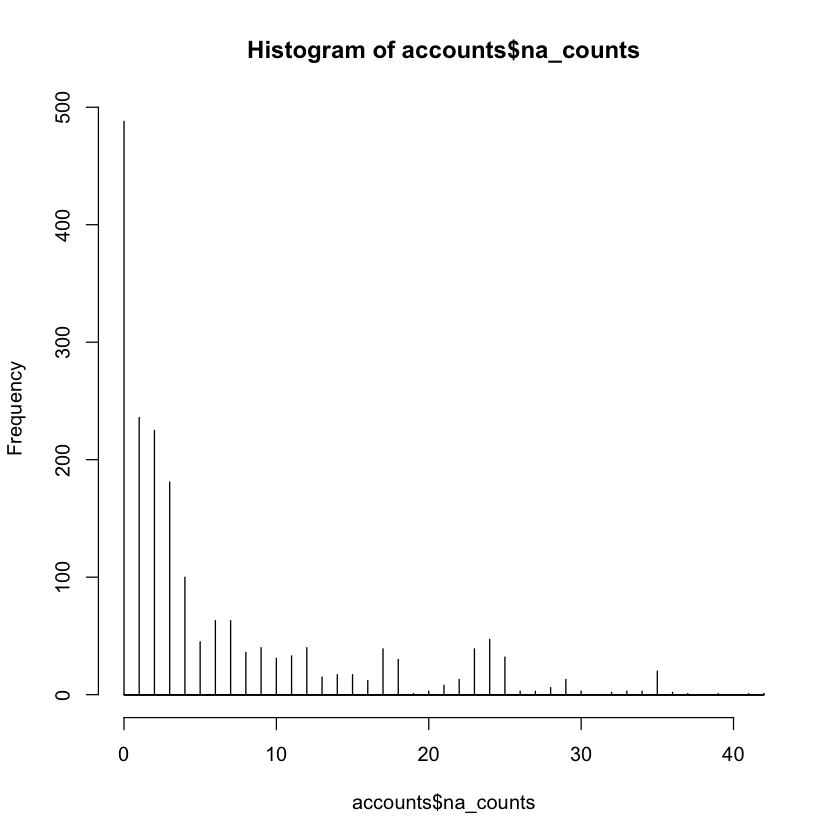

In [11]:
hist(accounts$na_counts, breaks = 10000)

In [12]:
data.frame(accounts)

Account,counts,na_counts,na_perc
1.0 - BLD 01_7836716,103,13,0.126213592
1.0 - BLD 01_7838586,103,16,0.155339806
1.0 - BLD 02_7694040,103,13,0.126213592
1.0 - BLD 03_7177432,103,14,0.135922330
1.0 - BLD 04_7381828,103,13,0.126213592
1.0 - BLD 05_6889487,103,13,0.126213592
1.0 - BLD 06_6469176,103,13,0.126213592
1.0 - BLD 07_7006908,73,1,0.013698630
10.0 - BLD 01_7864550,102,2,0.019607843
10.0 - BLD 02_7864551,102,2,0.019607843


## Explore the Anomalize package

#### plotting configuration for the flagged anomalies

In [ ]:
# ploting function for anomaly plots
ggsetup <- function(data) {
    data %>%
        ggplot(aes(rank, value, color = outlier)) +
        geom_point() +
        geom_line(aes(y = limit_upper), color = "red", linetype = 2) +
        geom_line(aes(y = limit_lower), color = "red", linetype = 2) +
        geom_text(aes(label = index), vjust = -1.25) +
        theme_bw() +
        scale_color_manual(values = c("No" = "#2c3e50", "Yes" = "#e31a1c")) +
        expand_limits(y = 13) +
        theme(legend.position = "bottom")
}

### Example 1 - Account with no missing data

#### Method 1: STL + IQR

In [ ]:
ts =  select(filter(tb_all, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr', alpha = 0.05) %>%
    time_recompose()

# ts_anomalized %>% glimpse()

ts_anomalized$Month_Value = format(ts_anomalized$Month,"%m")

#### Plot the decomposed results with outliers

In [ ]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Total, Seasonal, Trend & Residuals") 
p1

#### Plot the anomalies by its rank of deviation

In [ ]:
outliers <- iqr(ts_anomalized$remainder, verbose = TRUE)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Interquartile Range Method - Top outlers sorted by rank") 

In [ ]:
a <- ts_anomalized[filter(outliers, outlier == 'Yes')$index, c(1,2,4,6,5,7,8,9)]

a <- rename(a, Calendar_Month = Month, Total = observed, Trend = trend, Seasonal = season
       , Residual = remainder, Residual_Lower_Limit = remainder_l1, Residual_Upper_Limit = remainder_l2)

a

In [ ]:
a[, c(1,2,3,4,5,6)]

#### Method 2: Twitter + GESD

In [ ]:
ts =  select(filter(tb_all, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "twitter", merge = TRUE) %>%
    anomalize(remainder, method = 'gesd') %>%
    time_recompose()

# ts_anomalized %>% glimpse()

The Twitter decomposition method returns more outilers than the original STL method.

In [ ]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Total, Seasonal, Trend & Residuals") 

p1

#### Plot the anomalies by its rank of deviation

In [ ]:
outliers <- gesd(ts_anomalized$remainder, alpha = 0.05,  verbose = TRUE)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Generalized ESD Method - Top outlers sorted by rank") 

In [ ]:
b <- ts_anomalized[filter(outliers, outlier == 'Yes')$index, c(1,2,4,6,5,7)]

b <- rename(b, Calendar_Month = Month, Total = observed, Trend = median_spans, Seasonal = season, Residual = remainder)

In [ ]:
b[c(1,3,4,2,5,6),]

## Questions:

- Why does the GESD test return outliers in this order? 
- Does the Anomalize package implemented the GESD test as suggested in the Twitter paper, using MAD instead of Median?

### Method 3: XmR chart

In [ ]:
tb =  select(filter(tb_all, Building_Meter == '165.0 - BLD 03_90327795'), 'Month', 'Imputed_KWH')

In [ ]:
ts_anomalized <- tb %>%
  time_decompose(Imputed_KWH, method = "STL", merge = TRUE)
ts_anomalized <- rename(ts_anomalized, Residual = remainder)


In [ ]:
library(ggQC)
library(gridExtra)

In [ ]:
x_Plot <- ggplot(ts_anomalized, aes(x = Month, y = Residual)) + geom_point() + geom_line() + 
  stat_QC(method = 'XmR', auto.label = T, label.digits = 2, show.1n2.sigma = F) 

mR_Plot <- ggplot(ts_anomalized, aes(x = Month, y = Residual)) + stat_mR() + stat_QC_labels(method="mR")

grid.arrange(x_Plot, mR_Plot, nrow=2)

In [ ]:
# summarize the control limits
ctrl_limits <- QC_Lines(data = ts_anomalized$Residual, method = "XmR")     
ts_anomalized <- cbind(ts_anomalized, ctrl_limits)

cal_dev <- function(x) {
  if (x$Residual < x$xBar_one_LCL) {
    return(x$xBar_one_LCL - x$Residual)
  } else if (x$Residual > x$xBar_one_UCL) {
    return(x$Residual - x$xBar_one_UCL)
  } else {
    return (NA)
  }
}

In [ ]:
dev <- rep(NA, nrow(ts_anomalized))
for (i in 1:nrow(ts_anomalized)) {
  dev[[i]] <- cal_dev(ts_anomalized[i, ])
}
ts_anomalized$Dev = dev

In [ ]:
ts_anomalized

In [ ]:
anomalies <- select(arrange(filter(ts_anomalized, !is.na(Dev)), desc(Dev)), c('Month', 'Imputed_KWH', 'trend', 'season', 'Residual'))
rename(anomalies, Total = Imputed_KWH, Trend = trend, Seasonal = season)

### Adjust the max_anoms parameter

#### STL + IQR

#### cap the max_anoms

In [ ]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr', max_anoms = (sum(ts$Imputed_KWH == 0) + 2)/nrow(ts)) %>%
    time_recompose()

# ts_anomalized %>% glimpse()

By specifying the max number of outliers allowed, we get exactly the amount of outliers specified. The algorithm returns data points that have the largest absolute deviations in the residual component. 

In [ ]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'")

p1

#### adjust the factors multiplied by IQR

In [ ]:
ts =  select(filter(tb_all, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr', alpha = 0.025) %>%
    time_recompose()

# ts_anomalized %>% glimpse()

By specifying the max number of outliers allowed, we get exactly the amount of outliers specified. The algorithm returns data points that have the largest absolute deviations in the residual component. 

In [ ]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'")

p1

In [ ]:
outliers <- iqr(ts_anomalized$remainder, verbose = TRUE, alpha = 0.025)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Interquartile Range Method (6X IQR) - Top outlers sorted by rank") 

### Example 2 - Account with three missing values in the middle

#### Method: STL + IQR

In [ ]:
ts =  select(filter(tb, Building_Meter == '164.0 - BLD 01_96973681'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = 'stl', merge = TRUE) %>%
    anomalize(remainder, method = 'iqr') %>%
    time_recompose()

In [ ]:
filter(ts_anomalized, anomaly == 'Yes')

In [ ]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'Auto'")

p1

#### Method: Twitter + GESD

In [ ]:
ts =  select(filter(tb, Building_Meter == '164.0 - BLD 01_96973681'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = 'twitter', merge = TRUE) %>%
    anomalize(remainder, method = 'gesd') %>%
    time_recompose()

In [ ]:
filter(ts_anomalized, anomaly == 'Yes')

In [ ]:
p1 <- ts_anomalized %>%
    plot_anomaly_decomposition(alpha_dot = 0.5) +
    ggtitle("Freq/Trend = 'auto'")

p1

## Loop through all accounts (with at least 50 months of data)

We can do the following parameters tuning for each account:
- Twitter vs. STL decomposition method
- IQR vs. GESD test on residuals
- max_anom for the upper limit of number of outliers
- others

For now, we just use the default setting and same parameter configurations for all accounts.

Only consider accounts with more than 50 months of data

In [ ]:
accounts = tb_all %>% group_by(Building_Meter) %>% summarise(counts = n(), na_counts = sum(Imputed_KWH == 0))
accounts <- filter(accounts, counts - na_counts >= 50)
accounts <- mutate(accounts, na_perc = na_counts/counts)
dim(accounts)
summary(accounts$na_perc)

#### STL + IQR method

In [ ]:
results_stl <- vector("list", length(accounts)) 

start.time <- Sys.time()

for (i in 1:length(accounts$Building_Meter)) {
# for (i in 1:2) {
    ts = select(filter(tb_all, Building_Meter == accounts$Building_Meter[[i]]), 'Month', 'Imputed_KWH')
    ts_anomalized <- ts %>%
        time_decompose(Imputed_KWH, merge = TRUE, method = 'stl') %>%
        anomalize(remainder, method = 'iqr', alpha = 0.025) %>%
        time_recompose()
    ts_anomalized$Account = accounts$Building_Meter[[i]]
    results_stl[[i]] <- ts_anomalized
}

end.time <- Sys.time()
time.taken.stl <- end.time - start.time

In [ ]:
for (i in 1:length(results_stl)) {
    results_stl[[i]]$missing_value = (results_stl[[i]]$Imputed_KWH == 0)
}

In [ ]:
results_stl.025 <- results_stl

In [ ]:
results_stl.05 <- results_stl

In [ ]:
head(results_stl.025[[4]])

In [ ]:
head(results_stl.05[[4]])

### Join the two data frames, add outlier indicator according to XmR, compare all three!
### each of the 3 methods, output the outlier rank if outlier_ind == TRUE
### try XmR using median instead of mean for the example account

In [ ]:
for (i in 1:length(results_stl)) {
    result_stl = join(select(results_stl.025[[i]], c('Month', 'Account', Imputed_KWH)))
}

##### Summary of the % of anomalies detected

In [ ]:
points = lapply(results_stl, function(i) nrow(i))
anoamly_counts = lapply(results_stl, function(i) nrow(filter(i, anomaly == 'Yes')))
na_counts = lapply(results_stl, function(i) nrow(filter(i, missing_value == TRUE)))
anomaly_non_na_counts = lapply(results_stl, function(i) nrow(filter(i, (anomaly == 'Yes') & (missing_value == FALSE))))

summary_stl = tibble('account' = accounts$Building_Meter, 'points' = unlist(points)
                     , 'na' = unlist(na_counts)
                     , 'anomalies' = unlist(anoamly_counts), 'anomalies_non_na' = unlist(anomaly_non_na_counts)
                    )
summary_stl <- mutate(summary_stl, na_perc = na/points)
summary_stl = mutate(summary_stl, anom_perc = anomalies / points)
summary_stl <- mutate(summary_stl, diff = na + anomalies_non_na - anomalies)
summary(summary_stl$anom_perc)

In [ ]:
head(summary_stl)

#### Twitter + GESD method

In [ ]:
# results_twitter <- vector("list", length(accounts)) 

# start.time <- Sys.time()

# for (i in 1:length(accounts$Building_Meter)) {
# # for (i in 1:2) {
#     ts = select(filter(tb, Building_Meter == accounts$Building_Meter[[i]]), 'Month', 'Imputed_KWH')
#     ts_anomalized <- ts %>%
#         time_decompose(Imputed_KWH, merge = TRUE, method = 'twitter') %>%
#         anomalize(remainder, method = 'gesd', alpha = 0.05) %>%
# #         anomalize(remainder) %>%
#         time_recompose()
#     ts_anomalized$Account = accounts$Building_Meter[[i]]
#     results_twitter[[i]] <- ts_anomalized
# }

# end.time <- Sys.time()
# time.taken.twitter <- end.time - start.time

In [ ]:
# for (i in 1:length(results_twitter)) {
#     results_twitter[[i]]$missing_value = (results_stl[[i]]$observed == 0)
# }

##### Summary of the % of anomalies detected

In [ ]:
# points = lapply(results_twitter, function(i) nrow(i))
# anoamly_counts = lapply(results_twitter, function(i) nrow(filter(i, anomaly == 'Yes')))
# na_counts = lapply(results_twitter, function(i) nrow(filter(i, missing_value == TRUE)))
# anomaly_non_na_counts = lapply(results_twitter, function(i) nrow(filter(i, (anomaly == 'Yes') & (missing_value == FALSE))))

# summary_twitter = tibble('account' = accounts$Building_Meter, 'points' = unlist(points)
#                      , 'na' = unlist(na_counts)
#                      , 'anomalies' = unlist(anoamly_counts), 'anomalies_non_na' = unlist(anomaly_non_na_counts)
#                     )
# summary_twitter = mutate(summary_twitter, anom_perc = anomalies / points)
# summary_twitter <- mutate(summary_twitter, diff = na + anomalies_non_na - anomalies)
# summary(summary_twitter$anom_perc)

In [ ]:
# i = match('56.0 - BLD 18_8572092', accounts$Building_Meter)
# results_twitter[[i]] %>% plot_anomalies()
# # results_stl[[i]] %>% plot_anomalies(time_recomposed = TRUE)
# # results_stl[[i]] %>% plot_anomaly_decomposition(alpha_dot = 0.5)
    

In [ ]:
# hist(summary_twitter$anom_perc,
#       main="Frequency count of % of anomalies, Twitter + GESD, Alpha = 0.05",
#       xlab="% of anomalies detected",
#       ylab="Relative frequency",
#       breaks=50,
#       col="lightblue",
#       freq=FALSE)                            # freq=FALSE means to plot density, not counts
# #       xaxt="yes")                              # xaxt="n" means "x axis tick marks == no"

#### Comparing results from the two approaches

In [ ]:
# summary.default <- bind_cols(summary_stl, summary_twitter)

# colnames(summary.default) <- c('account', 'points', 'anomalies_stl', 'anom_perc_stl', 'account', 'points1', 'anomalies_twitter', 'anom_perc_twitter')

# summary.default <- summary.default[, c('account', 'points', 'anomalies_stl', 'anom_perc_stl', 'anomalies_twitter', 'anom_perc_twitter')]

# summary.default <- mutate(summary.default, anom_perc_diff = (anomalies_stl - anomalies_twitter)/points)

In [ ]:
# hist(summary.default$anom_perc_diff, breaks = 100)

In [ ]:
# head(filter(summary, anom_perc_diff > 0) %>% arrange(desc(anom_perc_diff)), 10)

In [ ]:
# head(filter(summary, anom_perc_diff < 0) %>% arrange(desc(-anom_perc_diff)), 10)

In [ ]:
# i = match('30.0 - BLD 04_8095311', accounts$Building_Meter)
# results_stl[[i]] %>%
#     plot_anomaly_decomposition(alpha_dot = 0.5) +
#     ggtitle("STL + IQR")
# summary_stl[i, ]

# results_twitter[[i]] %>%
#     plot_anomaly_decomposition(alpha_dot = 0.5) +
#     ggtitle("Twitter + GESD")
# summary_twitter[i, ]
# i = i + 1

### Save the results into rdata files

##### default setting version 

In [ ]:
# results_stl.default <- results_stl
# time.taken.stl.default <- time.taken.stl

# results_twitter.default <- results_twitter
# time.taken.twitter.default <- time.taken.twitter

# summary.default <- summary

# save(results_stl.default, time.taken.stl.default, results_twitter.default, time.taken.twitter.default, summary.default
#      , file = "decomposition_results_default_setting.RData")

In [ ]:
# load('./decomposition_results_default_setting.RData')

##### alpha = 0.025 version 

In [ ]:
# results_stl.025 <- results_stl
# time.taken.stl.025 <- time.taken.stl

# results_twitter.025 <- results_twitter
# time.taken.twitter.025 <- time.taken.twitter

# summary.025 <- summary

# save(results_stl.025, time.taken.stl.025, results_twitter.025, time.taken.twitter.025, summary.025
#      , file = "decomposition_results_025.RData")

In [ ]:
# load('./decomposition_results_025.RData')

### Plot the histogram of % of anomalies detected 

In [ ]:
head(summary_stl)

In [ ]:
hist(summary_stl$anom_perc * 100,
      main="Frequency count of % of anomalies, Decomposition",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=100,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 25, by = 1))                        

In [ ]:
hist(filter(summary_stl, na_perc == 0)$anom_perc * 100,
      main="Frequency count of % of anomalies, Decomposition",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=100,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 20, by=1))                        

#### Misc testing

In [ ]:
filter(summary_stl, account == '1.0 - BLD 03_7177432')

In [ ]:
plot(results_stl[[4]]$Imputed_KWH)

In [ ]:
hist(results_stl[[4]]$remainder)

In [ ]:
x_Plot <- ggplot(results_stl[[4]], aes(x = Month, y = remainder)) + geom_point() + geom_line() + 
  stat_QC(method = 'XmR', auto.label = T, label.digits = 2, show.1n2.sigma = F) 

mR_Plot <- ggplot(results_stl[[4]], aes(x = Month, y = remainder)) + stat_mR() + stat_QC_labels(method="mR")

grid.arrange(x_Plot, mR_Plot, nrow=2)

In [ ]:
outliers <- iqr(results_stl[[4]]$remainder, verbose = TRUE, alpha = 0.025)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Interquartile Range Method (6X of IQR) - Top outlers sorted by rank") 

In [ ]:
outliers <- iqr(results_stl[[4]]$remainder, verbose = TRUE, alpha = 0.05)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Interquartile Range Method (3X of IQR) - Top outlers sorted by rank") 

In [ ]:
results_stl[[4]]

In [ ]:
i = match('56.0 - BLD 18_8572092', accounts$Building_Meter)
results_stl[[4]] %>% plot_anomalies()
# results_stl[[i]] %>% plot_anomalies(time_recomposed = TRUE)
# results_stl[[i]] %>% plot_anomaly_decomposition(alpha_dot = 0.5)
    

### Load in data from other 2 approaches

### Prophet

In [ ]:
summary_prophet = read_csv("../../output//histogram_prophet.csv")

summary_prophet <- select(summary_prophet, c('Build_id', 'Total_Count', 'Total_Anomalies', 'Percentage'))

summary_prophet <- rename(summary_prophet, account = Build_id, points = Total_Count, anomalies = Total_Anomalies, anom_perc = Percentage)

In [ ]:
summary_prophet <- inner_join(summary_prophet, accounts, by = c("account" = "Building_Meter"))

In [ ]:
head(summary_prophet)

#### all 1,740 accounts are included in the 1,916 accounts

In [ ]:
dim(summary_prophet)

In [ ]:
summary_prophet$anom_perc

In [ ]:
accounts

In [ ]:
hist(c(summary_prophet$anom_perc, rep(0, nrow(accounts) - length(summary_prophet$anom_perc))), 
      main="Frequency count of % of anomalies, Prophet",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=100,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 10, by=1))

In [ ]:
hist(filter(summary_prophet, na_perc == 0)$anom_perc,
      main="Frequency count of % of anomalies, Prophet",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=100,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 10, by=1))

In [ ]:
hist(summary_prophet$anomalies,
      main="Frequency count of # of anomalies, Prophet",
      xlab="# of anomalies detected",
      ylab="Absolute frequency",
      breaks=10,
      col="lightblue",
      freq=TRUE)                            # freq=FALSE means to plot density, not counts
#       xaxt="yes")                              # xaxt="n" means "x axis tick marks == no"

### Clustering

In [ ]:
summary_clustering = read_csv("../../output/summary_clustering.csv")

summary_clustering <- rename(summary_clustering, account = Building_Meter, non_anomalies = 'FALSE', anomalies = 'TRUE', anom_perc = PCNT)

summary_clustering <- mutate(summary_clustering, points = non_anomalies + anomalies)

summary_clustering <- select(summary_clustering, c('account', 'points', 'anomalies', 'anom_perc'))

summary_clustering <- mutate(summary_clustering, anom_perc = round(anom_perc * 100, 8))

In [ ]:
summary_clustering <- inner_join(summary_clustering, accounts, by = c("account" = "Building_Meter"))

In [ ]:
hist(summary_clustering$anom_perc,
      main="Frequency count of % of anomalies, Clustering",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=1000,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 20, by=1))                        

In [ ]:
hist(filter(summary_clustering, na_perc == 0)$anom_perc,
      main="Frequency count of % of anomalies, Clustering",
      xlab="% of anomalies detected",
      ylab="Absolute frequency",
#       breaks=1000,
      col="lightblue",
      freq=TRUE,                            # freq=FALSE means to plot density, not counts
      xaxt="n")                              # xaxt="n" means "x axis tick marks == no"
axis(side=1, at=seq(0, 20, by=1))                        

In [ ]:
filter(summary_clustering, is.na(anomalies))

## Consider the case of level shifts
- Twitter + GESD is better than STL + IQR
- Should consider change level detection prior to decomposition

#### Level shift in the middle
- STL + IQR will bypass the middle level shift (can't detect the level change)
- Twitter + GESD treats all points at the shifted level as outliers

In [ ]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

idx_outliers <- seq(50, 70)
ts$Imputed_KWH[idx_outliers] <- ts$Imputed_KWH[idx_outliers] + mean(ts$Imputed_KWH)/2

ts_anomalized_twitter <- ts %>%
    time_decompose(Imputed_KWH, method = "Twitter", merge = TRUE) %>%
    anomalize(remainder, method = 'gesd', max_anoms = 20/nrow(ts) + (nrow(ts) - 20)/nrow(ts)) %>%
    time_recompose()

ts_anomalized_stl <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr', max_anoms = 20/nrow(ts) + (nrow(ts) - 20)/nrow(ts)) %>%
    time_recompose()

# ts_anomalized %>% glimpse()

In [ ]:
ts_anomalized_stl %>%
    plot_anomalies(alpha_dots = 1) + geom_line()

In [ ]:
ts_anomalized_twitter %>%
    plot_anomalies(alpha_dots = 1) + geom_line()

#### Level shift in the end
- neither method perform well
- need to apply the decomposition on the two levels separately

In [ ]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

idx_outliers <- seq(50, length(ts))
ts$Imputed_KWH[idx_outliers] <- ts$Imputed_KWH[idx_outliers] + mean(ts$Imputed_KWH)/2

ts_anomalized_twitter <- ts %>%
    time_decompose(Imputed_KWH, method = "Twitter", merge = TRUE) %>%
    anomalize(remainder, method = 'gesd') %>%
    time_recompose()

ts_anomalized_stl <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr') %>%
    time_recompose()

# ts_anomalized %>% glimpse()

In [ ]:
ts_anomalized_twitter %>%
    plot_anomaly_decomposition(alpha_dot = 0.5)

In [ ]:
ts_anomalized_stl %>%
    plot_anomaly_decomposition(alpha_dot = 0.5)

## Testing the Anomalize package

#### Test 1 - Test the IQR test function (No issue)

In [ ]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'iqr') %>%
    time_recompose()

In [ ]:
filter(ts_anomalized, anomaly == 'Yes')

In [ ]:
outliers <- iqr(ts_anomalized$remainder, alpha = 0.05, max_anoms = 0.2, verbose = TRUE)$outlier_report


outliers

In [ ]:
# ploting function for anomaly plots
ggsetup <- function(data) {
    data %>%
        ggplot(aes(rank, value, color = outlier)) +
        geom_point() +
        geom_line(aes(y = limit_upper), color = "red", linetype = 2) +
        geom_line(aes(y = limit_lower), color = "red", linetype = 2) +
        geom_text(aes(label = index), vjust = -1.25) +
        theme_bw() +
        scale_color_manual(values = c("No" = "#2c3e50", "Yes" = "#e31a1c")) +
        expand_limits(y = 13) +
        theme(legend.position = "bottom")
}

p4 <- outliers %>% 
    ggsetup() +
    ggtitle("Top outlers sorted by rank") 

p4

#### End of test 1

#### Test 2-  Test the GESD function
- remainder_l1, remainder_l2, recomposed_l1, recomposed_l2 values are incorrect in the time_recompose returned tibble (they should vary however in the ts_anomalize tibble they remain constant as the bounds for the first non-anomaly data point)
- some remainder values fall within its reminder range but were still labeled as an anomaly (when STL + GESD is applied)

In [ ]:
ts =  select(filter(tb, Building_Meter == '165.0 - BLD 03_90327795'), 'Building_Meter', 'Month', 'Imputed_KWH')

ts_anomalized <- ts %>%
    time_decompose(Imputed_KWH, method = "STL", merge = TRUE) %>%
    anomalize(remainder, method = 'gesd') %>%
    time_recompose()

In [ ]:
ts_anomalized

In [ ]:
outliers <- anomalize::gesd(ts_anomalized$remainder, alpha = 0.05, max_anoms = 0.2, verbose = TRUE)$outlier_report

In [ ]:
filter(ts_anomalized, anomaly == 'Yes')

In [ ]:
outliers

In [ ]:
p4 <- outliers %>% 
    ggsetup() +
    ggtitle("Top outlers sorted by rank") 

p4

#### End of test2

## Conclusions
- The Twitter decomposition method works bette when a long-term trend is less dominant that the short-term seasonal component.
- Check the characteristics of the time series to decide which decomposition algorithm to apply
- Perform level-change, variance-change detections before applying the decomposition algorithm (need to learn the ecp or changepoint packages though)

In [ ]:
findme

In [ ]:
set.seed(1)
sample <- data.frame(Month = seq(ISOdate(2000,1,1), by = "month", length = 5), Value = c(rnorm(5, 2000, 500)))
sample[3, 'Value']<- 20000
sample <- as_tibble(sample)

In [ ]:
sample

In [ ]:
outliers <- iqr(sample$Value, verbose = TRUE)$outlier_report
outliers

In [ ]:
outliers <- iqr(sample$Value, verbose = TRUE)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Interquartile Range Method - Top outlers sorted by rank") 

In [ ]:
outliers <- gesd(sample$Value, alpha = 0.05, max_anoms = 0.2, verbose = TRUE)$outlier_report
outliers %>% 
    ggsetup() +
    ggtitle("Generalized ESD Method - Top outlers sorted by rank") 

In [ ]:
x_Plot <- ggplot(sample, aes(x = Month, y = Value)) + geom_point() + geom_line() + 
  stat_QC(method = 'XmR', auto.label = T, label.digits = 2, show.1n2.sigma = F) +
  ggtitle("Statistical Control Chart") 

mR_Plot <- ggplot(sample, aes(x = Month, y = Value)) + stat_mR() + stat_QC_labels(method="mR")

grid.arrange(x_Plot, mR_Plot, nrow=2)

In [ ]:
QC_Lines(data = sample$Value, method = "XmR")     